## ENEM X IDHM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Abrindo dataset ENEM 2019
mediaEnemMunicipios = pd.read_csv('mediaMunicipios2019.csv', sep=',', index_col=0) #index_col -> Retira coluna de índice
                                                                               #caso uma nova seja criada
mediaEnemMunicipios.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
0,1100015,Alta Floresta D'Oeste,11,RO,562.287234,503.024468,467.092819,495.192553,506.729255
1,1100023,Ariquemes,11,RO,535.417025,499.166337,463.640456,494.021582,509.741273
2,1100031,Cabixi,11,RO,503.437500,497.443750,454.453125,476.479688,490.650000
3,1100049,Cacoal,11,RO,546.793558,510.874488,469.204832,496.843997,511.780710
4,1100056,Cerejeiras,11,RO,556.301370,505.175685,468.381164,491.672945,508.293493


In [3]:
#Abrindo dataset do Atlas 2013 sobre o IDHM do Brasil (2010)
atlasHumano = pd.read_csv('atlas2013_dadosbrutos.csv', sep=';', encoding='ISO-8859-1')
atlasHumano.head()

,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1991,11,110001,1100015,ALTA FLORESTA D'OESTE,"0,329","0,112","0,617","0,516"
1,1991,11,110002,1100023,ARIQUEMES,"0,432","0,199","0,684","0,593"
2,1991,11,110003,1100031,CABIXI,"0,309","0,108","0,636","0,430"
3,1991,11,110004,1100049,CACOAL,"0,407","0,171","0,667","0,593"
4,1991,11,110005,1100056,CEREJEIRAS,"0,386","0,167","0,629","0,547"


In [4]:
# Merge = fundir, juntar informações
enemIDHM = pd.merge(mediaEnemMunicipios, atlasHumano, how='left',left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['Codmun7'])
enemIDHM

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015,Alta Floresta D'Oeste,11,RO,562.287234,503.024468,467.092819,495.192553,506.729255,1991.0,11.0,110001.0,1100015.0,ALTA FLORESTA D'OESTE,"0,329","0,112","0,617","0,516"
1,1100015,Alta Floresta D'Oeste,11,RO,562.287234,503.024468,467.092819,495.192553,506.729255,2000.0,11.0,110001.0,1100015.0,ALTA FLORESTA D'OESTE,"0,483","0,262","0,698","0,617"
2,1100015,Alta Floresta D'Oeste,11,RO,562.287234,503.024468,467.092819,495.192553,506.729255,2010.0,11.0,110001.0,1100015.0,ALTA FLORESTA D'OESTE,"0,641","0,526","0,763","0,657"
3,1100023,Ariquemes,11,RO,535.417025,499.166337,463.640456,494.021582,509.741273,1991.0,11.0,110002.0,1100023.0,ARIQUEMES,"0,432","0,199","0,684","0,593"
4,1100023,Ariquemes,11,RO,535.417025,499.166337,463.640456,494.021582,509.741273,2000.0,11.0,110002.0,1100023.0,ARIQUEMES,"0,556","0,343","0,742","0,674"
5,1100023,Ariquemes,11,RO,535.417025,499.166337,463.640456,494.021582,509.741273,2010.0,11.0,110002.0,1100023.0,ARIQUEMES,"0,702","0,600","0,806","0,716"
6,1100031,Cabixi,11,RO,503.437500,497.443750,454.453125,476.479688,490.650000,1991.0,11.0,110003.0,1100031.0,CABIXI,"0,309","0,108","0,636","0,430"
7,1100031,Cabixi,11,RO,503.437500,497.443750,454.453125,476.479688,490.650000,2000.0,11.0,110003.0,1100031.0,CABIXI,"0,488","0,284","0,677","0,604"
8,1100031,Cabixi,11,RO,503.437500,497.443750,454.453125,476.479688,490.650000,2010.0,11.0,110003.0,1100031.0,CABIXI,"0,650","0,559","0,757","0,650"
9,1100049,Cacoal,11,RO,546.793558,510.874488,469.204832,496.843997,511.780710,1991.0,11.0,110004.0,1100049.0,CACOAL,"0,407","0,171","0,667","0,593"


In [5]:
#Tranformar dados object (IDHM, IDHM_E, IDHM_L, IDHM_R) em float
enemIDHM.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_REDACAO            float64
NU_NOTA_MT                 float64
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
ANO                        float64
UF                         float64
Codmun6                    float64
Codmun7                    float64
Município                   object
IDHM                        object
IDHM_E                      object
IDHM_L                      object
IDHM_R                      object
dtype: object

In [6]:
#Transformar ',' em '.'
enemIDHM['IDHM'] = enemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
enemIDHM['IDHM_E'] = enemIDHM['IDHM_E'].apply(lambda x: float(str(x).replace(',','.')))
enemIDHM['IDHM_L'] = enemIDHM['IDHM_L'].apply(lambda x: float(str(x).replace(',','.')))
enemIDHM['IDHM_R'] = enemIDHM['IDHM_R'].apply(lambda x: float(str(x).replace(',','.')))

In [7]:
#Dados transformados
enemIDHM.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_REDACAO            float64
NU_NOTA_MT                 float64
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
ANO                        float64
UF                         float64
Codmun6                    float64
Codmun7                    float64
Município                   object
IDHM                       float64
IDHM_E                     float64
IDHM_L                     float64
IDHM_R                     float64
dtype: object

In [8]:
#Média das médias em redação e do IDHM
media_redacao = enemIDHM.NU_NOTA_REDACAO.mean()
media_redacao

551.9127001107257

In [9]:
media_idhm = enemIDHM.IDHM.mean()
media_idhm

0.5213368673255465

Quadrante 1: 27.79640718562874%, baixo IDHM, baixa nota
Quadrante 2: 21.53293413173653%, alto IDHM, baixa nota
Quadrante 3: 31.718562874251496%, alto IDHM, alta nota
Quadrante 4: 18.922155688622755%, baixo IDHM, baixa nota


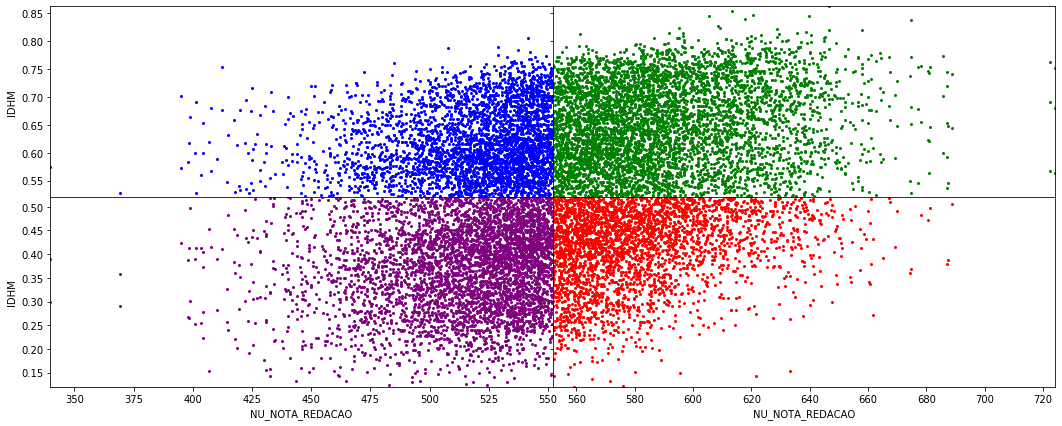

In [10]:
idhmMunicipios = enemIDHM.IDHM
notaMunicipios = enemIDHM.NU_NOTA_REDACAO

q1 = (idhmMunicipios < media_idhm) & (notaMunicipios < media_redacao)
q2 = (idhmMunicipios > media_idhm) & (notaMunicipios < media_redacao)
q3 = (idhmMunicipios > media_idhm) & (notaMunicipios > media_redacao)
q4 = (idhmMunicipios < media_idhm) & (notaMunicipios > media_redacao)

fig, ax = plt.subplots(2,2, figsize=(18,7), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0) #Junta todos os gráficos

minRedacao = enemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = enemIDHM.NU_NOTA_REDACAO.max()
minIDHM = enemIDHM.IDHM.min()
maxIDHM = enemIDHM.IDHM.max()


#Quadrante 1 com nota de redação no eixo x e IDHM no eixo y, de cor roxa
#com notas de redação abaixo da média e IDHM abaixo da média
mediaEnemIDHM1 = enemIDHM[q1] #quadrante 1
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=4, ax = ax[1,0], color='purple', xlim = (minRedacao,media_redacao), ylim = (minIDHM, media_idhm))
print('Quadrante 1: {}%, baixo IDHM, baixa nota'.format(100*len(mediaEnemIDHM1.IDHM)/len(idhmMunicipios)))

#Quadrante 2 com nota de redação no eixo x e IDHM no eixo y, de cor azul
#com notas de redação abaixo da média e IDHM acima da média
mediaEnemIDHM2 = enemIDHM[q2] #quadrante 2
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=4, ax = ax[0,0], color='blue', xlim = (minRedacao,media_redacao), ylim = (media_idhm, maxIDHM,))
print('Quadrante 2: {}%, alto IDHM, baixa nota'.format(100*len(mediaEnemIDHM2.IDHM)/len(idhmMunicipios)))

#Quadrante 3 com nota de redação no eixo x e IDHM no eixo y, de cor verde
#com notas de redação acima da média e IDHM acima da média
mediaEnemIDHM3 = enemIDHM[q3] #quadrante 3
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=4, ax = ax[0,1], color='green', xlim= (media_redacao, maxRedacao), ylim = (media_idhm, maxIDHM,))
print('Quadrante 3: {}%, alto IDHM, alta nota'.format(100*len(mediaEnemIDHM3.IDHM)/len(idhmMunicipios)))

#Quadrante 4 com nota de redação no eixo x e IDHM no eixo y, de cor vermelha
#com notas de redação acima da média e IDHM abaixo da média
mediaEnemIDHM4 = enemIDHM[q4] #quadrante 4
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=4, ax = ax[1,1], color='red', xlim = (media_redacao, maxRedacao), ylim = (minIDHM, media_idhm))
print('Quadrante 4: {}%, baixo IDHM, baixa nota'.format(100*len(mediaEnemIDHM4.IDHM)/len(idhmMunicipios)))

In [11]:
#Média das médias em matemática
media_matematica = enemIDHM.NU_NOTA_MT.mean()
media_matematica

506.10952870283813

Quadrante 1: 31.64071856287425%, baixo IDHM, baixa nota
Quadrante 2: 21.15568862275449%, alto IDHM, baixa nota
Quadrante 3: 32.09580838323353%, alto IDHM, alta nota
Quadrante 4: 15.077844311377245%, baixo IDHM, baixa nota


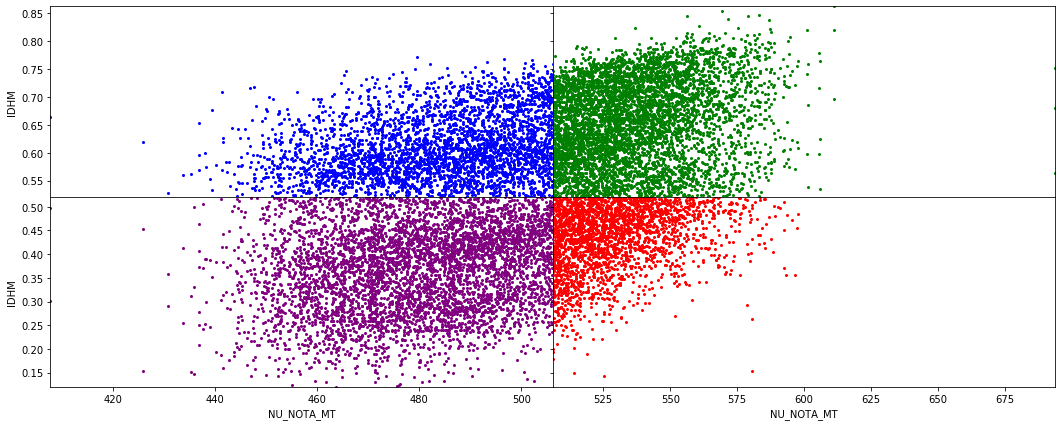

In [12]:
idhmMunicipios = enemIDHM.IDHM
notaMunicipios = enemIDHM.NU_NOTA_MT

q1 = (idhmMunicipios < media_idhm) & (notaMunicipios < media_matematica)
q2 = (idhmMunicipios > media_idhm) & (notaMunicipios < media_matematica)
q3 = (idhmMunicipios > media_idhm) & (notaMunicipios > media_matematica)
q4 = (idhmMunicipios < media_idhm) & (notaMunicipios > media_matematica)

fig, ax = plt.subplots(2,2, figsize=(18,7), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0) #Junta todos os gráficos

minMatematica = enemIDHM.NU_NOTA_MT.min()
maxMatematica = enemIDHM.NU_NOTA_MT.max()
minIDHM = enemIDHM.IDHM.min()
maxIDHM = enemIDHM.IDHM.max()


#Quadrante 1 com nota de Matemática no eixo x e IDHM no eixo y, de cor roxa
#com notas de matemática abaixo da média e IDHM abaixo da média
mediaEnemIDHM1 = enemIDHM[q1] #quadrante 1
mediaEnemIDHM1.plot.scatter('NU_NOTA_MT', 'IDHM', s=4, ax = ax[1,0], color='purple', xlim = (minMatematica,media_matematica), ylim = (minIDHM, media_idhm))
print('Quadrante 1: {}%, baixo IDHM, baixa nota'.format(100*len(mediaEnemIDHM1.IDHM)/len(idhmMunicipios)))

#Quadrante 2 com nota de Matemática no eixo x e IDHM no eixo y, de cor azul
#com notas de matemática abaixo da média e IDHM acima da média
mediaEnemIDHM2 = enemIDHM[q2] #quadrante 2
mediaEnemIDHM2.plot.scatter('NU_NOTA_MT', 'IDHM', s=4, ax = ax[0,0], color='blue', xlim = (minMatematica,media_matematica), ylim = (media_idhm, maxIDHM,))
print('Quadrante 2: {}%, alto IDHM, baixa nota'.format(100*len(mediaEnemIDHM2.IDHM)/len(idhmMunicipios)))

#Quadrante 3 com nota de Matemática no eixo x e IDHM no eixo y, de cor verde
#com notas de matemática acima da média e IDHM acima da média
mediaEnemIDHM3 = enemIDHM[q3] #quadrante 3
mediaEnemIDHM3.plot.scatter('NU_NOTA_MT', 'IDHM', s=4, ax = ax[0,1], color='green', xlim= (media_matematica, maxMatematica), ylim = (media_idhm, maxIDHM,))
print('Quadrante 3: {}%, alto IDHM, alta nota'.format(100*len(mediaEnemIDHM3.IDHM)/len(idhmMunicipios)))

#Quadrante 4 com nota de Matemática no eixo x e IDHM no eixo y, de cor vermelha
#com notas de matemática acima da média e IDHM abaixo da média
mediaEnemIDHM4 = enemIDHM[q4] #quadrante 4
mediaEnemIDHM4.plot.scatter('NU_NOTA_MT', 'IDHM', s=4, ax = ax[1,1], color='red', xlim = (media_matematica, maxMatematica), ylim = (minIDHM, media_idhm))
print('Quadrante 4: {}%, baixo IDHM, baixa nota'.format(100*len(mediaEnemIDHM4.IDHM)/len(idhmMunicipios)))

In [13]:
#Média das médias em ciências naturais
media_cn = enemIDHM.NU_NOTA_CN.mean()
media_cn

462.860920844298

Quadrante 1: 31.892215568862277%, baixo IDHM, baixa nota
Quadrante 2: 20.562874251497007%, alto IDHM, baixa nota
Quadrante 3: 32.68862275449102%, alto IDHM, alta nota
Quadrante 4: 14.826347305389222%, baixo IDHM, baixa nota


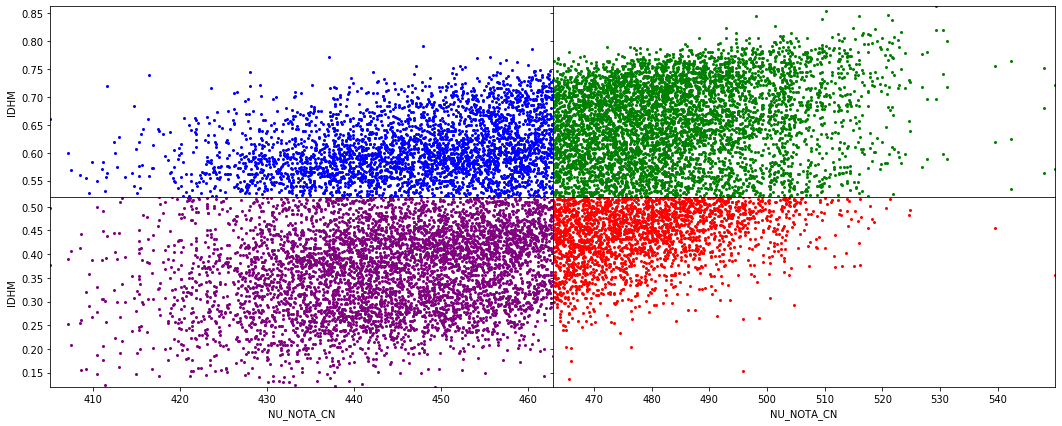

In [14]:
idhmMunicipios = enemIDHM.IDHM
notaMunicipios = enemIDHM.NU_NOTA_CN

q1 = (idhmMunicipios < media_idhm) & (notaMunicipios < media_cn)
q2 = (idhmMunicipios > media_idhm) & (notaMunicipios < media_cn)
q3 = (idhmMunicipios > media_idhm) & (notaMunicipios > media_cn)
q4 = (idhmMunicipios < media_idhm) & (notaMunicipios > media_cn)

fig, ax = plt.subplots(2,2, figsize=(18,7), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0) #Junta todos os gráficos

minCN = enemIDHM.NU_NOTA_CN.min()
maxCN = enemIDHM.NU_NOTA_CN.max()
minIDHM = enemIDHM.IDHM.min()
maxIDHM = enemIDHM.IDHM.max()


#Quadrante 1 com nota de Ciências Naturais no eixo x e IDHM no eixo y, de cor roxa
#com notas de ciências naturais abaixo da média e IDHM abaixo da média
mediaEnemIDHM1 = enemIDHM[q1] #quadrante 1
mediaEnemIDHM1.plot.scatter('NU_NOTA_CN', 'IDHM', s=4, ax = ax[1,0], color='purple', xlim = (minCN,media_cn), ylim = (minIDHM, media_idhm))
print('Quadrante 1: {}%, baixo IDHM, baixa nota'.format(100*len(mediaEnemIDHM1.IDHM)/len(idhmMunicipios)))

#Quadrante 2 com nota de Ciências Naturais no eixo x e IDHM no eixo y, de cor azul
#com notas de ciências naturais abaixo da média e IDHM acima da média
mediaEnemIDHM2 = enemIDHM[q2] #quadrante 2
mediaEnemIDHM2.plot.scatter('NU_NOTA_CN', 'IDHM', s=4, ax = ax[0,0], color='blue', xlim = (minCN,media_cn), ylim = (media_idhm, maxIDHM,))
print('Quadrante 2: {}%, alto IDHM, baixa nota'.format(100*len(mediaEnemIDHM2.IDHM)/len(idhmMunicipios)))

#Quadrante 3 com nota de Ciências Naturais no eixo x e IDHM no eixo y, de cor verde
#com notas de ciências naturais acima da média e IDHM acima da média
mediaEnemIDHM3 = enemIDHM[q3] #quadrante 3
mediaEnemIDHM3.plot.scatter('NU_NOTA_CN', 'IDHM', s=4, ax = ax[0,1], color='green', xlim= (media_cn, maxCN), ylim = (media_idhm, maxIDHM,))
print('Quadrante 3: {}%, alto IDHM, alta nota'.format(100*len(mediaEnemIDHM3.IDHM)/len(idhmMunicipios)))

#Quadrante 4 com nota de Ciências Naturais no eixo x e IDHM no eixo y, de cor vermelha
#com notas de ciências naturais acima da média e IDHM abaixo da média
mediaEnemIDHM4 = enemIDHM[q4] #quadrante 4
mediaEnemIDHM4.plot.scatter('NU_NOTA_CN', 'IDHM', s=4, ax = ax[1,1], color='red', xlim = (media_cn, maxCN), ylim = (minIDHM, media_idhm))
print('Quadrante 4: {}%, baixo IDHM, baixa nota'.format(100*len(mediaEnemIDHM4.IDHM)/len(idhmMunicipios)))